In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
car_data=pd.read_csv('./archive_2/CarPrice_Assignment.csv')

In [30]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [32]:
print(car_data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [33]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [34]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
car_data['fueltype']=labelencoder.fit_transform(car_data['fueltype'])
car_data['aspiration']=labelencoder.fit_transform(car_data['aspiration'])
car_data['carbody']=labelencoder.fit_transform(car_data['carbody'])
car_data['drivewheel']=labelencoder.fit_transform(car_data['drivewheel'])
car_data['enginelocation']=labelencoder.fit_transform(car_data['enginelocation'])
car_data['fuelsystem']=labelencoder.fit_transform(car_data['fuelsystem'])

In [36]:
car_data['doornumber']=car_data['doornumber'].map({'two':2,'four':4})

In [37]:
car_data.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,2,3,1,0,99.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,4,3,1,0,105.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,4,4,1,0,105.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,4,3,1,0,105.8,...,131,5,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,2,2,0,0,99.5,...,131,5,3.13,3.40,7.00,160,5500,16,22,17859.167


In [38]:
print(car_data.shape)

(205, 26)


In [39]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

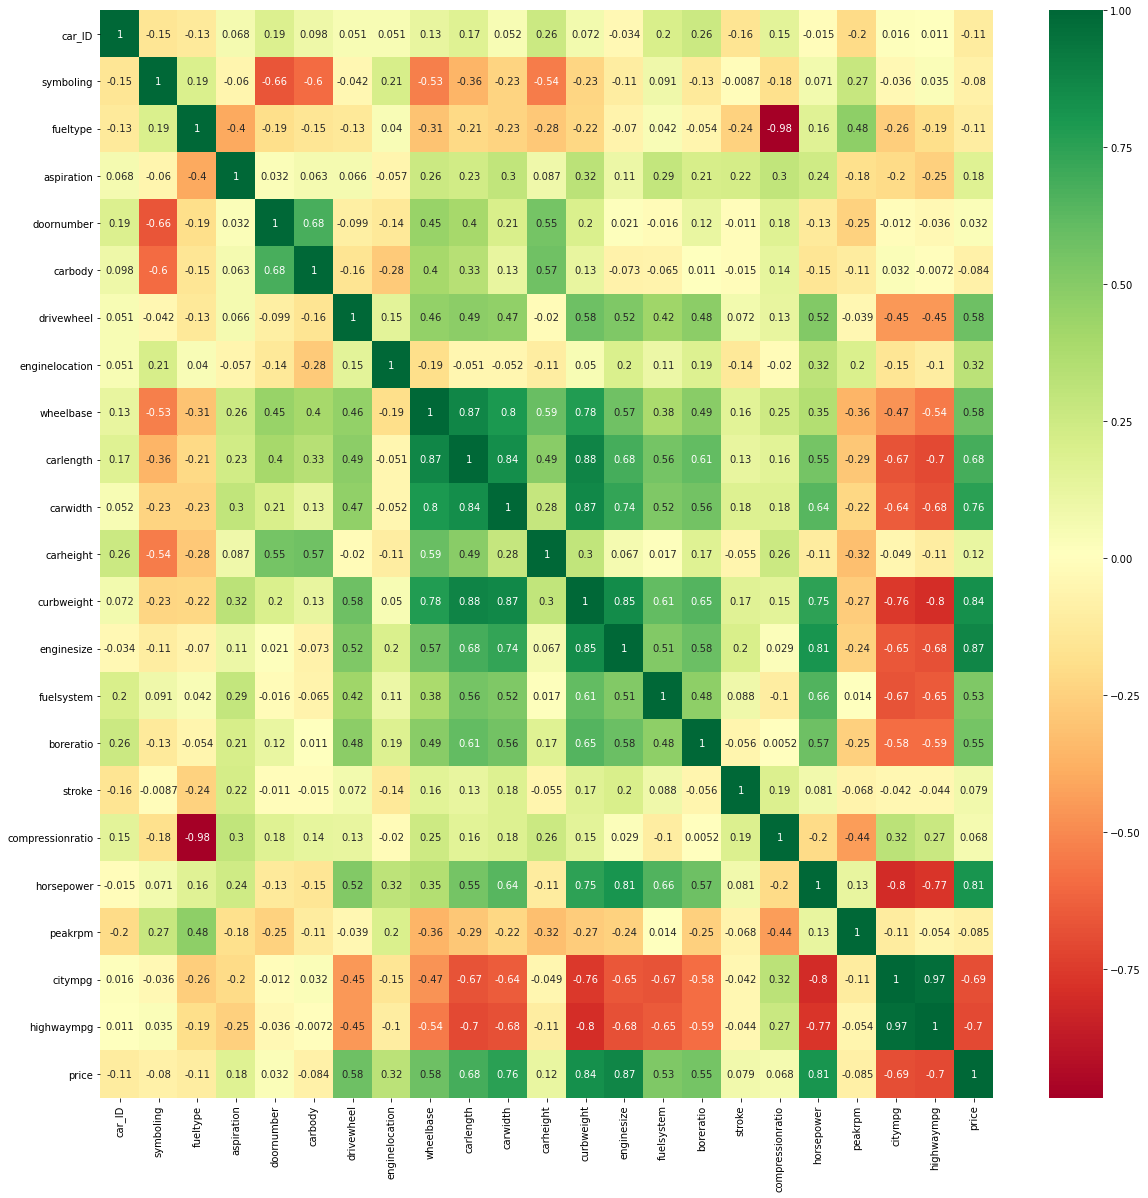

In [40]:
corrmat=car_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(car_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
car_data1=car_data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel','price','enginelocation']]

In [92]:
print(car_data1.shape)
car_data1.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


In [43]:
x=(car_data1.loc[:, car_data1.columns !='price'])
y=(car_data1.loc[:, car_data1.columns =='price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=42)

In [70]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(9,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile (optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [71]:
car_data1.shape

(205, 10)

In [77]:
import numpy as np

k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_car_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data= np.concatenate(
    [x_train[:i * num_val_samples],
     x_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
     y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
   
 

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [80]:
val_mse, val_mae = model.evaluate(val_car_data, val_targets)

all_scores.append(val_mae)

2/2 [==============================] - 0s 4ms/step - loss: 39118536.0000 - mae: 4348.6855


In [87]:
print(x_train.iloc[0,:])



horsepower          92.00
boreratio            3.31
enginesize         122.00
curbweight        2458.00
carwidth            66.50
carlength          175.60
wheelbase          102.40
drivewheel           1.00
enginelocation       0.00
Name: 177, dtype: float64


In [88]:
print(y_train[0:10])

       price
177  11248.0
75   16503.0
174  10698.0
31    6855.0
12   20970.0
35    7295.0
125  22018.0
42   10345.0
156   6938.0
136  18150.0


In [91]:
model.predict(x_train)

array([[12755.613 ],
       [16240.495 ],
       [12590.247 ],
       [ 9225.702 ],
       [14742.758 ],
       [10084.433 ],
       [15348.865 ],
       [11964.167 ],
       [10431.278 ],
       [15405.677 ],
       [11455.648 ],
       [ 9438.391 ],
       [17062.77  ],
       [12110.29  ],
       [12894.124 ],
       [15607.12  ],
       [10013.768 ],
       [11114.04  ],
       [ 9925.054 ],
       [15618.867 ],
       [15673.536 ],
       [16944.582 ],
       [15746.788 ],
       [ 9685.781 ],
       [14319.363 ],
       [11032.349 ],
       [16298.383 ],
       [12287.591 ],
       [10313.842 ],
       [10190.562 ],
       [18349.441 ],
       [12292.312 ],
       [ 9307.346 ],
       [14572.346 ],
       [12993.146 ],
       [ 9790.835 ],
       [12454.696 ],
       [17329.06  ],
       [10924.084 ],
       [14996.729 ],
       [11458.425 ],
       [16298.383 ],
       [15643.909 ],
       [10923.747 ],
       [15119.031 ],
       [ 8969.435 ],
       [16784.516 ],
       [11654

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
0,103.0,4.0,152.0,3000.0,70.0,170.0,90.0,2.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
a

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
0,103.0,4.0,152.0,3000.0,70.0,170.0,90.0,2.0,1.0


In [102]:
model.predict(a)

array([[16154.558]], dtype=float32)